# Research Progress Meeting 2020-03-xx

## Let's see how spills develop in terms of other performance metrics

## Setup

In [1]:
library(tidyverse)
library(oildata)
library(DataAnalysisTools)
library(gridExtra)

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
packageVersion("oildata")

[1] ‘1.0.7’

In [3]:
head(pipelines)

year,commodity,ID,name,offshore_share,on_offshore,hca,miles,volume_crude,volume_hvl,⋯,estimate_volume_all,volume_specific,estimate_volume_specific,incidents,significant_incidents,serious_incidents,incidents_volume,significant_incidents_volume,incidents_cost,significant_incidents_cost
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2008,crude,11733,Loop,0.2008889,total,38.25,112.5,40852116635,0,⋯,40852116635,40852116635,40852116635,0,0,0,0,0,0,0
2008,crude,11733,Loop,0.2008889,offshore,3.00,22.6,NA,NA,⋯,8206736320,NA,8206736320,0,0,0,0,0,0,0
2008,crude,11733,Loop,0.2008889,onshore,35.25,89.9,NA,NA,⋯,32645380315,NA,32645380315,0,0,0,0,0,0,0
2008,hvl,3156,Davis Gas Processing,0.0000000,total,1.00,30.0,0,48,⋯,48,48,48,0,0,0,0,0,0,0
2008,hvl,3156,Davis Gas Processing,0.0000000,offshore,0.00,0.0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2008,hvl,3156,Davis Gas Processing,0.0000000,onshore,1.00,30.0,0,48,⋯,48,48,48,0,0,0,0,0,0,0


## Overview

In [4]:
pipelines_year <- pipelines %>%
    group_by(year, on_offshore) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    pivot_longer(cols = -c(year, on_offshore), names_to = "variable", values_to = "value")

glimpse(pipelines_year)

Observations: 900
Variables: 4
Groups: year [15]
$ year        <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 200…
$ on_offshore <chr> "offshore", "offshore", "offshore", "offshore", "offshore…
$ variable    <chr> "hca", "miles", "incidents", "volume_crude", "volume_hvl"…
$ value       <dbl> 1.000900e+03, 5.085560e+03, 1.300000e+01, NA, NA, NA, NA,…


In [5]:
unique(pipelines_year$variable)

[1] "hca"                          "miles"                       
 [3] "incidents"                    "volume_crude"                
 [5] "volume_hvl"                   "volume_rpp"                  
 [7] "volum_other"                  "estimate_volume_crude"       
 [9] "estimate_volume_hvl"          "estimate_volume_rpp"         
[11] "estimate_volume_other"        "estimate_volume_specific"    
[13] "volume_all"                   "estimate_volume_all"         
[15] "significant_incidents"        "serious_incidents"           
[17] "incidents_volume"             "significant_incidents_volume"
[19] "incidents_cost"               "significant_incidents_cost"

In [6]:
overview <- pipelines_year %>%
    filter(variable %in% c("miles", "significant_incidents", "incidents_cost", "incidents_volume")) %>%
    ggplot(aes(x = year, y = value)) +
        facet_wrap(on_offshore ~ variable, scales = "free") +
        geom_line()

options(repr.plot.width=8, repr.plot.height=6)

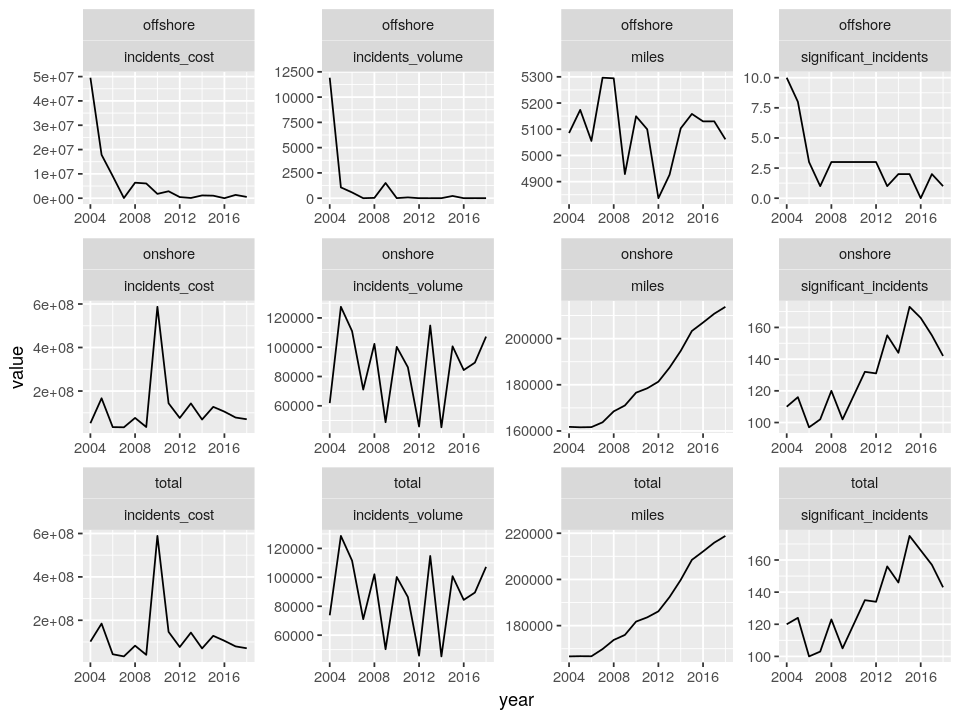

In [7]:
overview

All cost in 1984 dollars. Volume spilled in gallons.

### What is that cost spike in 2009 for *onshore*?!

In [8]:
subset(incidents, on_offshore == "onshore" & cost_1984 > 1e+8, -narrative)

DATAFILE_AS_OF,significant,serious,ID,name,year,lat,long,cost,cost_1984,⋯,installation_year,FATAL,INJURE,cause,CAUSE_DETAILS,MAP_CAUSE,MAP_SUBCAUSE,SPILL_TYPE_CATEGORY,volume,date
<dttm>,<lgl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>
2020-01-30 04:18:51,TRUE,FALSE,11169,"Enbridge Energy, Limited Partnership",2010,42.24329,-84.97251,840526118,460446182,⋯,1969,NA,NA,material,ENVIRONMENTAL CRACKING-RELATED,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,LARGE,20082,2010-07-25


It is the Kalamazoo River oil spill.

https://en.wikipedia.org/wiki/Kalamazoo_River_oil_spill

In [9]:
subset(incidents, round(cost_1984) == 460446182)$narrative %>%
    jupyter_styling(font_size = 14)

x
"On july 26, 2010, enbridge confirmed a mainline rupture on line 6b at mp608.2452. During the investigation it was determined that the rupture occurred simultaneously with a scheduled pipeline shutdown. As a result of the incident phmsa issued a corrective action order that ordered the pipeline to remain shut down until such time that the activities outlined in the cao were satisfied. Enbridge satisfied all conditions of the cao and received approval from phmsa to resume operations on september 27, 2010 at which time enbridge successfully restarted the line. Of further note, while the telephonic report to the nrc is stated as 13:33 on july 26, 2010, enbridge made a call to nrc and was on hold for a period of time. Enbridge then hung up the call and called again at which time it was on hold for a further period of time. The stated 13:33 reflects the time that enbridge was able to provide verbal notification of the incident. The release was initially estimated at 19,500 barrels of which an undetermined amount entered the talmadge creek and ultimately the kalamazoo river. The amount of estimated product released in or reaching water has not yet been confirmed and is based upon a calculation provided by an external consultant. The amount of oil that reached water is subject to further investigation. Enbridge is currently reviewing several methodologies to calculate this volume, and will communicate the methodology and subsequent volume to phmsa upon completion. The section that failed has been sent to a laboratory for a metallurgical analysis, under the direction of ntsb. Pending the results of metallurgical testing and failure investigations, enbridge is unable to provide complete and final data for this original report submission. Information contained in this report is to be considered estimated until supplemental and final reports are filed. Ntsb, phmsa and enbridge investigations into this accident have commenced. As this investigation is ongoing, the primary and secondary cause(s) have not been finalized. To date, enbridge has not found any potable water sources (public or private) with drinking water contamination that has been verifiably linked to the enbridge release. The assessment of all drinking water sources in the affected area is ongoing. Enbridge is in the process of sampling drinking water sources and is working directly with state and local public health officials in evaluating drinking water from potable wells to ensure public health. Enbridge estimated that it will incur aggregate charges between $300 million and $400 million. These charges include emergency response, environmental remediation and cleanup activities associated with the crude oil release, costs to repair the pipeline and related inspection costs, potential claims by third parties, and lost revenue. We continue to work to accurately project the total cost of the leak and its remediation, however we are unable to break it down into the specific detail requested in this form due to the complexity of the efforts. As further information becomes known, supplemental reports will be filed as required. See attached uploaded file for supplemental narrative as of december 20, 2010. See attached uploaded file for supplemental narrative as of february 22, 2011. See attached uploaded file for supplemental narrative as of march 6, 2012. See attached uploaded file for supplemental narrative as of june 28, 2013."


### What happened with offshore in '04?

In [10]:
subset(incidents, on_offshore == "offshore" & cost_1984 > 1e+7, -c(narrative, DATAFILE_AS_OF, significant, TOTAL_COST_CURRENT))

serious,ID,name,year,lat,long,cost,cost_1984,commodity,on_offshore,installation_year,FATAL,INJURE,cause,CAUSE_DETAILS,MAP_CAUSE,MAP_SUBCAUSE,SPILL_TYPE_CATEGORY,volume,date
<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<date>
FALSE,30969,Main Pass Oil Gathering System,2004,NA,NA,17600200,10968391,crude,offshore,1996,0,0,natural_forces,HIGH WINDS,NATURAL FORCE DAMAGE,HIGH WINDS,LARGE,5,2004-10-25
FALSE,2731,Chevron Pipe Line,2004,NA,NA,24000200,14956852,crude,offshore,NA,0,0,natural_forces,EARTH MOVEMENT,NATURAL FORCE DAMAGE,EARTH MOVEMENT,LARGE,4,2004-10-17


In [11]:
subset(incidents, round(cost_1984) == 14956852)$narrative

[1] "The subject pipeline was unintentionally moved by a underwater mud-slide that was generated by wave action by hurricane ivan.  The pipeline was torn in two by the forces of the mud-slide.  The seperation took place in south pass 38.  The pipeline was eventually located on october 18, 2004.    The leak duration in part g, item 3 is listed as 0-days and 0-hours because when the pipe was seperated it was shut-in for hurricane ivan and the spill was instantaneous."

In [12]:
subset(incidents, round(cost_1984) == 10968391)$narrative

[1] "During post-storm impact from hurricane ivan visible oil sheens were observed and reported near bp's main pass oil gathering pipeline in the vicinity of main pass block 69.  The oil sheens reported on 10-1-04 were fingerprinted and later confirmed as product transported in shell's 18\" pipeline.  During bp's post-storm assessments for the main pass oil gathering pipeline it was also confirmed that required separation was lost between the main pass oil gathering pipeline and shell's 18\" pipeline in the vicinity of main pass block 69.  It was during the operation of separating these two pipelines that the release from the main pass oil gathering pipeline occurred. The 10-26-04 leak was confirmed during a lifting of shell's equilon 18\" pipeline which was was located above and physically contacting the main pass oil gathering pipeline.  Just prior to the lifting of the shell pipeline, divers had removed the shell pipeline concrete coating with waterblasting equipment.  The bare portion of the lower main pass oil gathering pipeline was then examined and identified as having small pinholes in the vicinity of the contact point between the two pipelines, thus allowing crude oil to be released to receiving waters.  During this operation recovery equipment was in place and collecting all crude oil being released from the pipeline."

* The Chevron incident is the direct result of Hurricane Ivan in 2004:
    * https://en.wikipedia.org/wiki/Hurricane_Ivan
    * https://www.nytimes.com/2005/08/05/business/gulf-hurricanes-arelatest-kink-in-oil-chain.html
* Less information can be found on the damage to BP's offshore pipeline, but it is related to Hurrican Ivan also. The Hurricane cause earth movement, which for instance caused the Taylor Oil Spill. The Taylor platform used to belong to BP, so it seems likely that the same event also damaged a pipeline of BP in the area.
    * https://en.wikipedia.org/wiki/Taylor_oil_spill

## By commodity without offshore

In [13]:
pipelines_y_c <- pipelines %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    group_by(year, commodity) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    pivot_longer(cols = -c(year, commodity), names_to = "variable", values_to = "value")

glimpse(pipelines_y_c)

Observations: 900
Variables: 4
Groups: year [15]
$ year      <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,…
$ commodity <chr> "crude", "crude", "crude", "crude", "crude", "crude", "crud…
$ variable  <chr> "hca", "miles", "incidents", "volume_crude", "volume_hvl", …
$ value     <dbl> 1.754843e+04, 4.419932e+04, 1.370000e+02, NA, NA, NA, NA, 1…


In [41]:
overview_y_c <- pipelines_y_c %>%
    filter(variable %in% c("miles", "significant_incidents", "incidents_cost", "incidents_volume")) %>%
    ggplot(aes(x = year, y = value)) +
        facet_wrap(commodity ~ variable, scales = "free") +
        geom_line() +
        geom_smooth(method = "lm")

options(repr.plot.width=8, repr.plot.height=6)

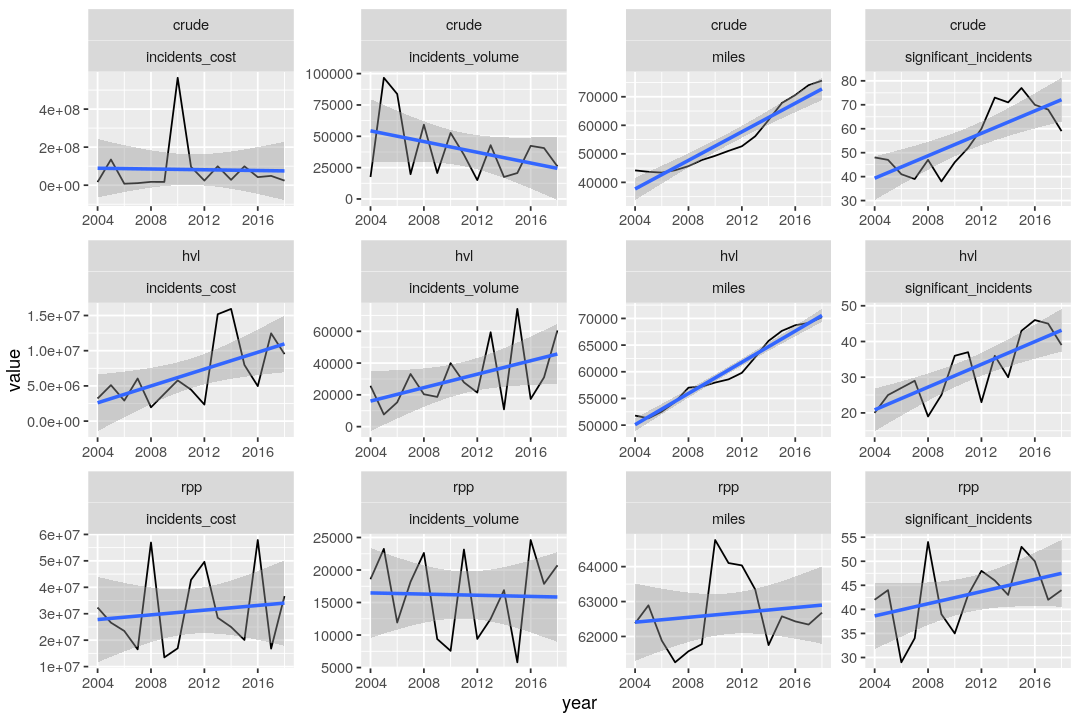

In [42]:
overview_y_c

## Relative to miles and volume transported

In [16]:
pipelines_y_c <- pipelines %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    group_by(year, commodity) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    mutate(cost_per_mile = incidents_cost/miles, 
           cost_per_volume = incidents_cost/estimate_volume_all, 
           volume_per_mile = incidents_volume/miles,
           volume_per_volume = incidents_volume/estimate_volume_all) %>%
    pivot_longer(cols = -c(year, commodity), names_to = "variable", values_to = "value")

glimpse(pipelines_y_c)

Observations: 1,080
Variables: 4
Groups: year [15]
$ year      <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,…
$ commodity <chr> "crude", "crude", "crude", "crude", "crude", "crude", "crud…
$ variable  <chr> "hca", "miles", "incidents", "volume_crude", "volume_hvl", …
$ value     <dbl> 1.754843e+04, 4.419932e+04, 1.370000e+02, NA, NA, NA, NA, 1…


In [17]:
standardized <- pipelines_y_c %>%
    filter(variable %in% c("cost_per_mile", "cost_per_volume", "volume_per_mile", "volume_per_volume")) %>%
    ggplot(aes(x = year, y = value)) +
        facet_wrap(commodity ~ variable, scales = "free") +
        geom_line() +
        geom_smooth(method = "lm")

options(repr.plot.width=8, repr.plot.height=6)

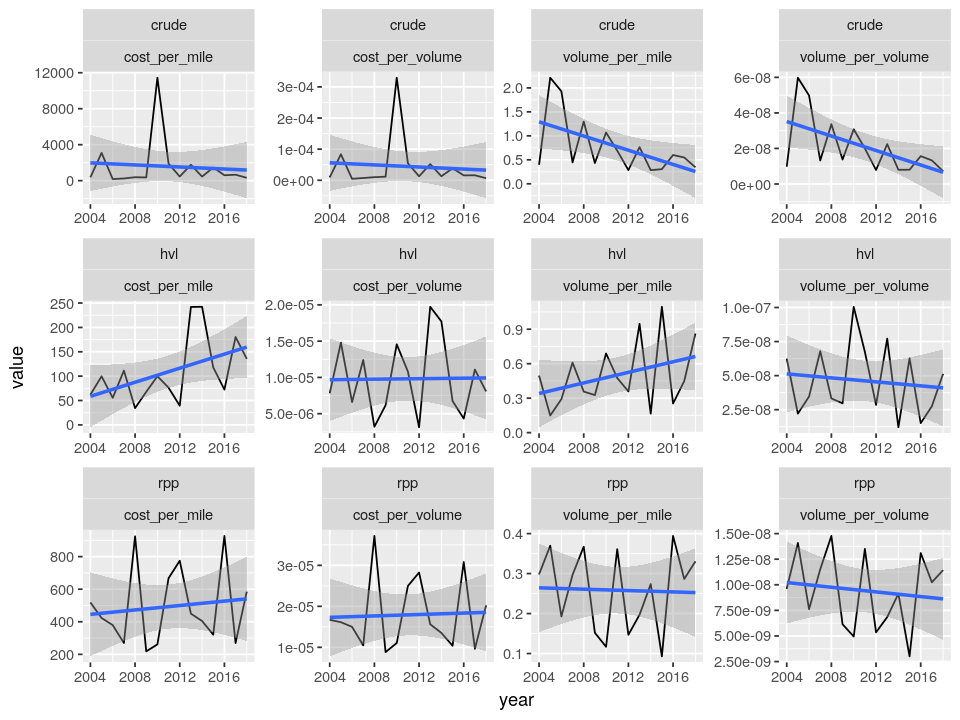

In [18]:
standardized

## Detailed view

In [19]:
options(repr.plot.width=8, repr.plot.height=5)

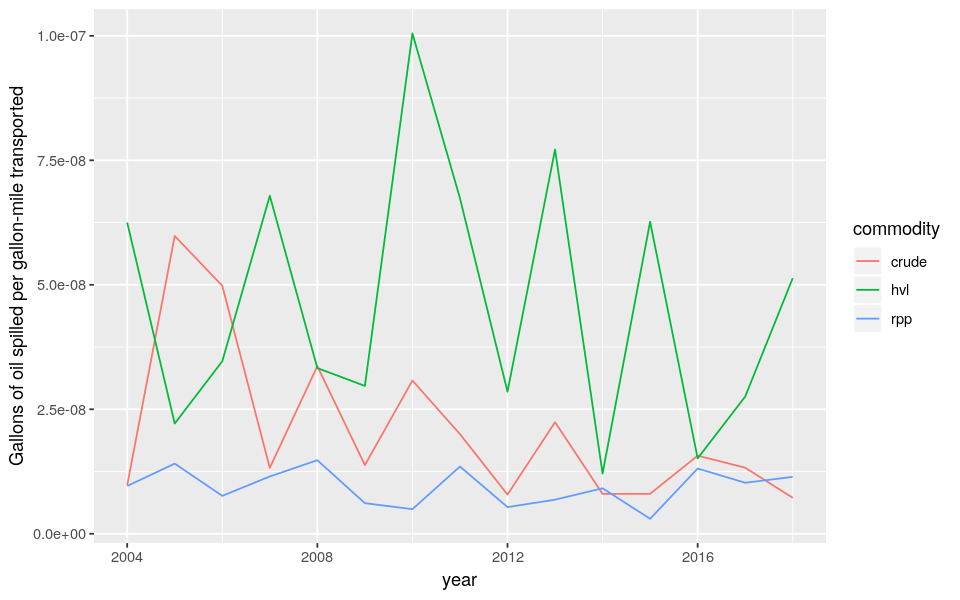

In [20]:
pipelines_y_c %>%
    filter(variable == "volume_per_volume") %>%
    ggplot(aes(x=year, y=value, color=commodity)) + 
        geom_line() +
        labs(y = "Gallons of oil spilled per gallon-mile transported")

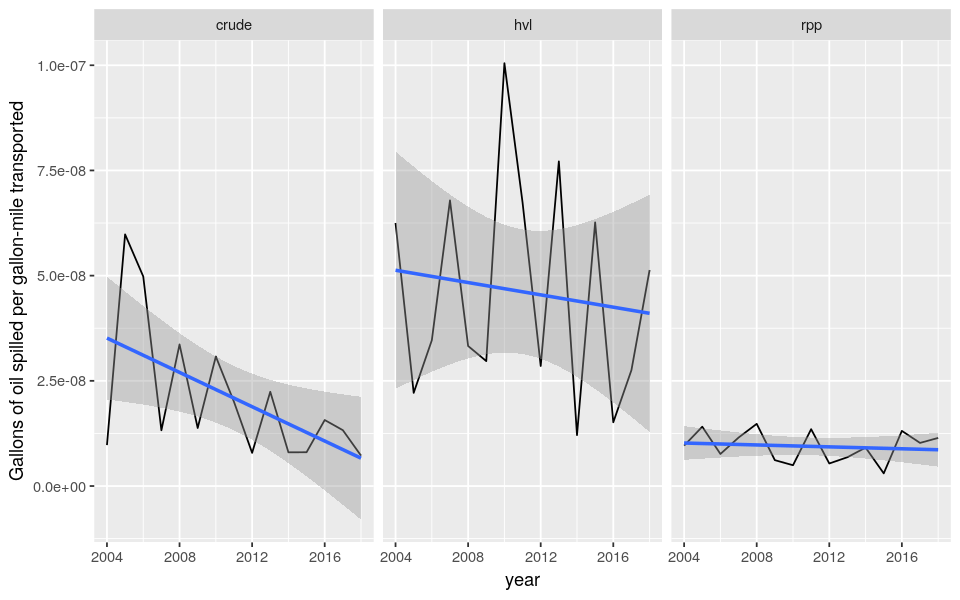

In [21]:
pipelines_y_c %>%
    filter(variable == "volume_per_volume") %>%
    ggplot(aes(x=year, y=value)) + 
        facet_wrap(~commodity) +
        geom_line() +
        geom_smooth(method = "lm") +
        labs(y = "Gallons of oil spilled per gallon-mile transported")

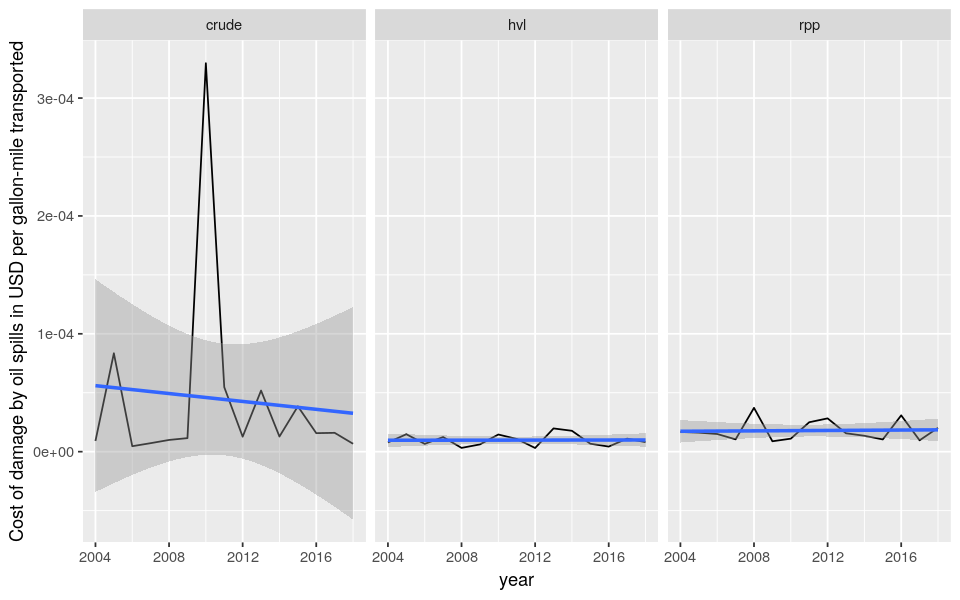

In [22]:
pipelines_y_c %>%
    filter(variable == "cost_per_volume") %>%
    ggplot(aes(x=year, y=value)) + 
        facet_wrap(~commodity) +
        geom_line() +
        geom_smooth(method = "lm") +
        labs(y = "Cost of damage by oil spills in USD per gallon-mile transported")

In [23]:
cost_graph <- pipelines_y_c %>%
    filter(variable == "cost_per_volume") %>%
    ggplot(aes(x=year, y=value)) + 
        facet_wrap(~commodity) +
        geom_line() +
        geom_smooth(method = "lm") +
        labs(y = "Cost of damage by oil spills in USD per gallon-mile transported") +
        scale_y_log10() +
        labs(title = "!!! Cost - log scaled !!!")

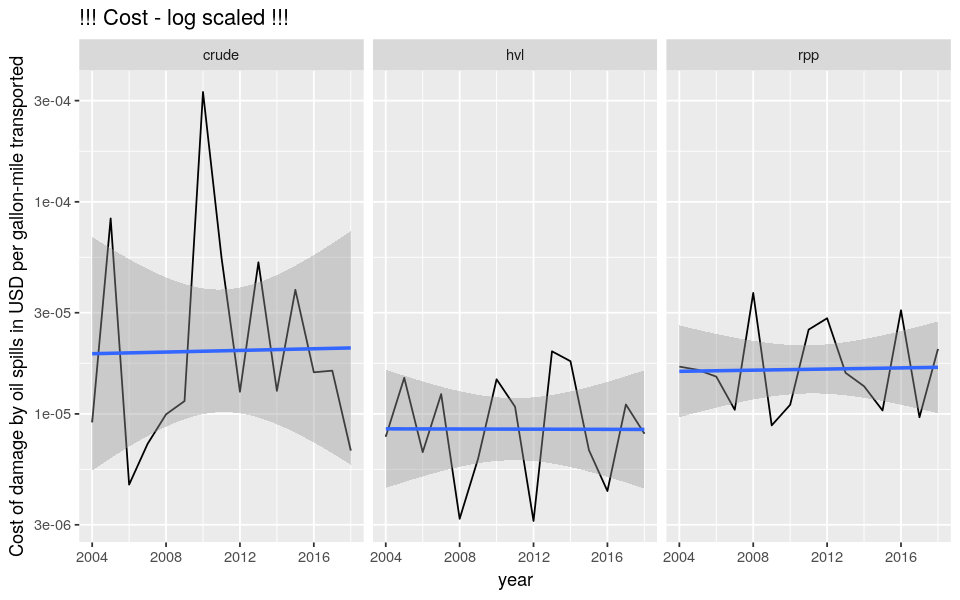

In [24]:
cost_graph

## Prominent cases

In [25]:
largest_companies <- pipelines %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("rpp", "crude", "hvl")) %>%
    group_by(year, ID) %>%
    summarize(miles = sum(miles, na.rm = T)) %>%
    group_by(ID) %>%
    filter(miles == max(miles)) %>%
    ungroup() %>%
    top_n(6, miles) %>%
    arrange(desc(miles))

largest_companies %>%
    jupyter_styling(font_size = 14)

year,ID,miles
2015,31618,22394.73
2018,Energy Transfer Partners (Group),14658.88
2006,Kinder Morgan (Group),14004.22
2017,Magellan (Group),12943.07
2005,Phillips 66 (Group),12000.00
2018,ONEOK (Group),11792.19


In [26]:
add_company_names(31618)

[1] "Enterprise Products Operating"

In [27]:
operators <- pipelines %>%
    filter(ID %in% c("31618", "Energy Transfer Partners (Group)", "Kinder Morgan (Group)")) %>%
    mutate(ID = add_company_names(ID)) %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    group_by(year, commodity, ID) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    mutate(cost_per_mile = incidents_cost/miles, 
           cost_per_volume = incidents_cost/estimate_volume_all, 
           volume_per_mile = incidents_volume/miles,
           volume_per_volume = incidents_volume/estimate_volume_all) %>%
    pivot_longer(cols = -c(year, commodity, ID), names_to = "variable", values_to = "value")
glimpse(operators)

Observations: 2,664
Variables: 5
Groups: year, commodity [45]
$ year      <dbl> 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,…
$ commodity <chr> "crude", "crude", "crude", "crude", "crude", "crude", "crud…
$ ID        <chr> "Enterprise Products Operating", "Enterprise Products Opera…
$ variable  <chr> "hca", "miles", "incidents", "volume_crude", "volume_hvl", …
$ value     <dbl> 69, 69, 0, NA, NA, NA, NA, 1204963486, 0, 0, 0, 1204963486,…


### Volume spilled per volume transported

In [28]:
crude <- operators %>%
    filter(variable %in% c("volume_per_volume")) %>%
    filter(commodity == "crude") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() +
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Crude oil", x = NULL, y = NULL)

hvl <- operators %>%
    filter(variable %in% c("volume_per_volume")) %>%
    filter(commodity == "hvl") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() + 
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Highly volatile liquid", x = NULL, y = NULL)

rpp <- operators %>%
    filter(variable %in% c("volume_per_volume")) %>%
    filter(commodity == "rpp") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() + 
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Refined petroleum products", x = NULL, y = NULL)

In [29]:
spill_volume_by_operator <- arrangeGrob(crude, hvl, rpp, ncol=1, left = "Gallons of oil spilled per gallon-mile transported")

options(repr.plot.width=8, repr.plot.height=6)

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”

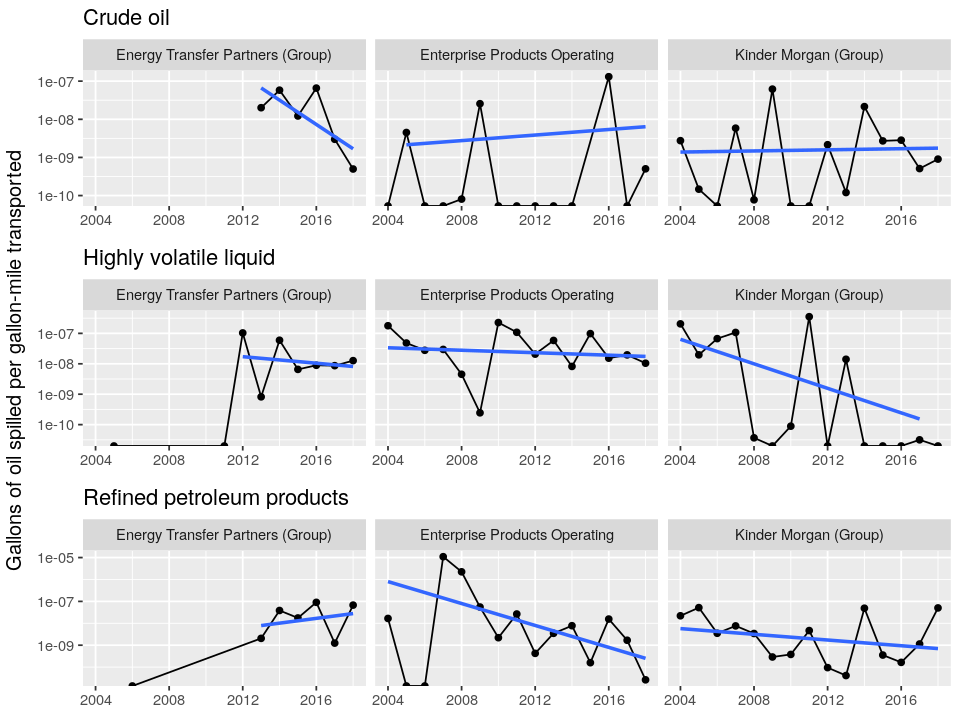

In [30]:
grid::grid.draw(spill_volume_by_operator)

### Total miles

In [31]:
crude <- operators %>%
    filter(variable %in% c("miles")) %>%
    filter(commodity == "crude") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() +
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Crude oil", x = NULL, y = NULL)

hvl <- operators %>%
    filter(variable %in% c("miles")) %>%
    filter(commodity == "hvl") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() + 
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Highly volatile liquid", x = NULL, y = NULL)

rpp <- operators %>%
    filter(variable %in% c("miles")) %>%
    filter(commodity == "rpp") %>%
    ggplot(aes(x=year, y=value)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line() + 
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Refined petroleum products", x = NULL, y = NULL)

In [32]:
volume_transported_by_operator <- arrangeGrob(crude, hvl, rpp, ncol=1, left = "Miles of pipeline")

options(repr.plot.width=8, repr.plot.height=6)

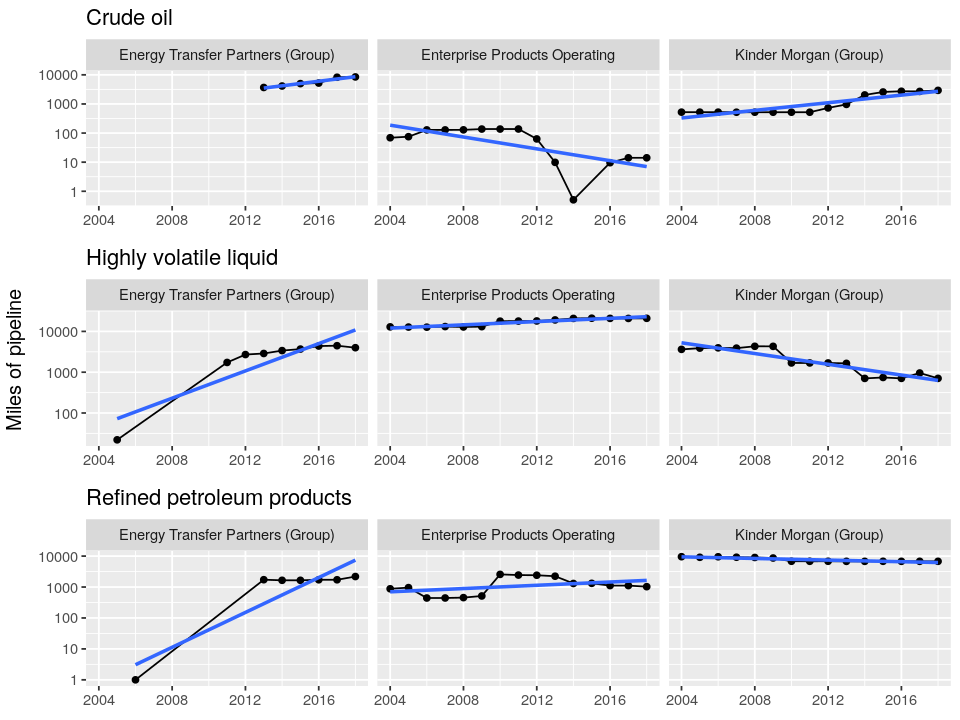

In [33]:
grid::grid.draw(volume_transported_by_operator)

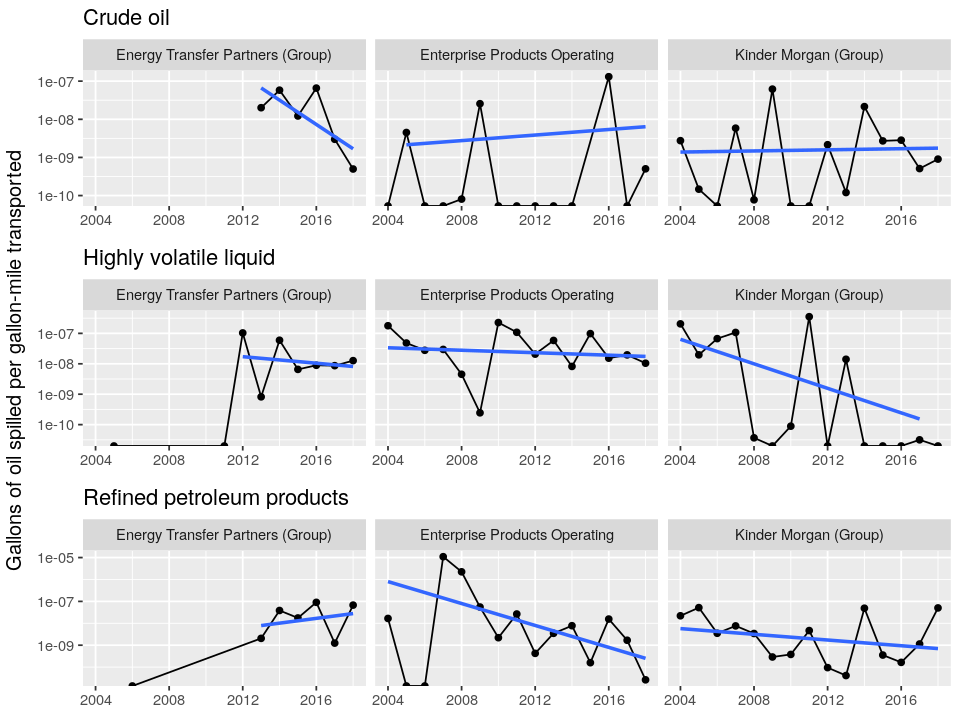

In [34]:
grid::grid.draw(spill_volume_by_operator)

### Using size argument

In [35]:
operators2 <- operators %>%
    filter(variable %in% c("volume_per_volume", "miles")) %>%
    pivot_wider(id_cols = c(year, commodity, ID), names_from = "variable", values_from = "value")

In [36]:
crude <- operators2 %>%
    filter(commodity == "crude") %>%
    ggplot(aes(x=year, y=volume_per_volume, size=miles)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line(aes(size=NULL)) +
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Crude oil", x = NULL, y = NULL)

hvl <- operators2 %>%
    filter(commodity == "hvl") %>%
    ggplot(aes(x=year, y=volume_per_volume, size=miles)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line(aes(size=NULL)) +
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Highly volatile liquid", x = NULL, y = NULL)

rpp <- operators2 %>%
    filter(commodity == "rpp") %>%
    ggplot(aes(x=year, y=volume_per_volume, size=miles)) +
        facet_wrap(~ ID) +
        geom_point() +
        geom_line(aes(size=NULL)) +
        scale_y_log10() +
        geom_smooth(method = "lm", se = F) +
        labs(title = "Refined petroleum products", x = NULL, y = NULL)

In [37]:
volume_per_size <- arrangeGrob(crude, hvl, rpp, ncol=1, left = "Gallons of oil spilled per gallon-mile transported")

options(repr.plot.width=8, repr.plot.height=6)

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”

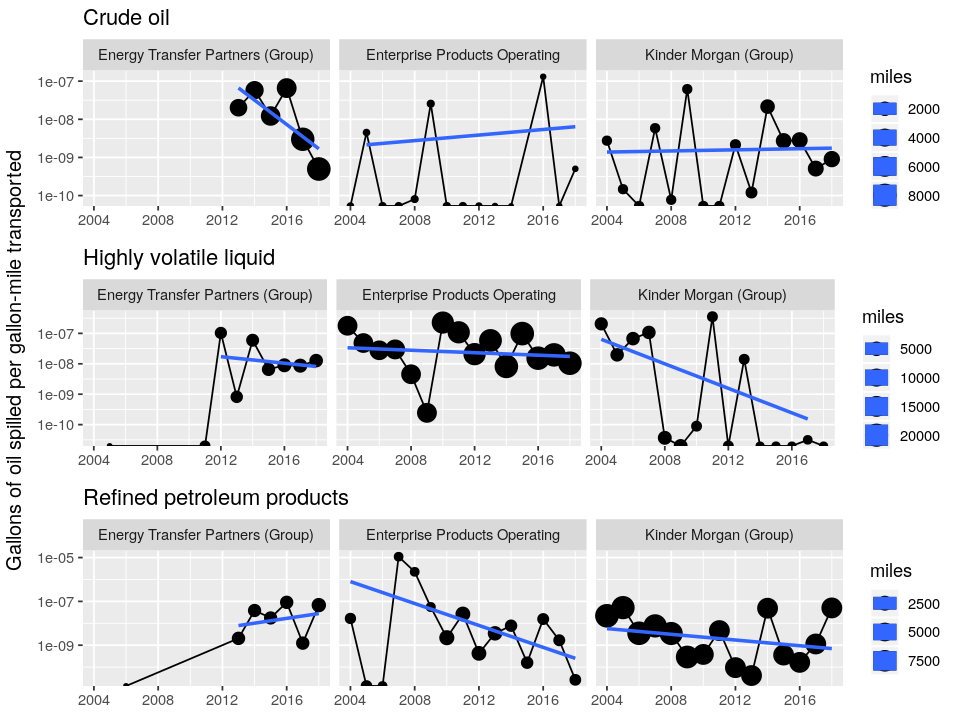

In [38]:
grid::grid.draw(volume_per_size)

## Test using all volume vs specific volume

In [39]:
using_volume_specific <- pipelines %>%
    filter(on_offshore == "onshore") %>%
    filter(commodity %in% c("crude", "hvl", "rpp")) %>%
    group_by(year, commodity) %>%
    summarize(!!! oildata::pipelines_consolidation) %>%
    mutate(volume_per_volume_specific = (
               incidents_volume/estimate_volume_specific), 
           cost_per_volume_specific = (
               incidents_cost/estimate_volume_specific)) %>%
    pivot_longer(cols = -c(year, commodity), 
                 names_to = "variable", values_to = "value") %>%
    filter(variable %in% c("cost_per_volume_specific", 
                           "volume_per_volume_specific")) %>%
    ggplot(aes(x = year, y = value)) +
        facet_wrap(variable ~ commodity, scales = "free") +
        geom_line() +
        geom_smooth(method = "lm")

options(repr.plot.width=8, repr.plot.height=6)

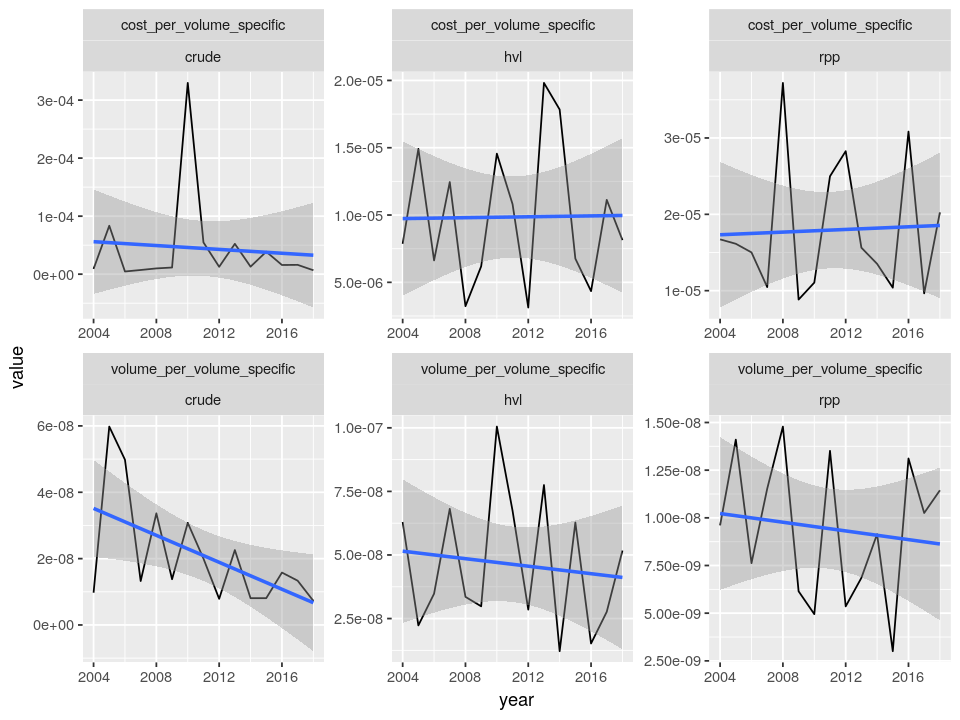

In [40]:
using_volume_specific

It looks very much the same as the previous graph, using volume_all.